Importando Dataset e tratando os dados

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('Dados\Churn_Modelling.csv')
dados = dados.dropna(subset=['IsActiveMember'])
dados['IsActiveMember'] = dados['IsActiveMember'].astype(int)
dados = dados.drop_duplicates(subset=['CustomerId'])
dados = dados.drop(columns=['Surname'])
dados_membroAtivo = dados[dados['IsActiveMember'] == 1]
dados_membroNaoAtivo = dados[dados['IsActiveMember'] == 0]
print(dados)


       RowNumber  CustomerId  CreditScore Geography  Gender   Age  Tenure  \
0              1    15634602          619    France  Female  42.0       2   
1              2    15647311          608     Spain  Female  41.0       1   
2              3    15619304          502    France  Female  42.0       8   
3              4    15701354          699    France  Female  39.0       1   
4              5    15737888          850     Spain  Female  43.0       2   
...          ...         ...          ...       ...     ...   ...     ...   
9995        9996    15606229          771    France    Male  39.0       5   
9996        9997    15569892          516    France    Male  35.0      10   
9997        9998    15584532          709    France  Female  36.0       7   
9998        9999    15682355          772   Germany    Male  42.0       3   
10000      10000    15628319          792    France  Female  28.0       4   

         Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\pedro\AppData\Local\Temp\ipykernel_37088\40433141.py:4: SyntaxWarning: invalid escape sequence '\C'
  dados = pd.read_csv('Dados\Churn_Modelling.csv')


Vendo correlação entre as variaveis numericas e a variavel alvo

In [64]:
dados_numericos = dados.drop(columns=['Geography','Gender','RowNumber','CustomerId'])
matrix_corr = dados_numericos.corr()
corr_with_member = matrix_corr['IsActiveMember'].sort_values(ascending=False)
print(corr_with_member)
print('\nCom essa informação podemos identificar variaveis mais adequadas para serem usadas para classificar: idade, pontos de credito e tempo afiliado (este sendo inversamente relacionado)')

dados_numericos = dados[['Age', 'CreditScore', 'Tenure','IsActiveMember']]
dados_num_membroAtivo = dados_numericos[dados_numericos['IsActiveMember'] == 1]
dados_num_membroNaoAtivo = dados_numericos[dados_numericos['IsActiveMember'] == 0]


IsActiveMember     1.000000
Age                0.085548
CreditScore        0.025806
NumOfProducts      0.009534
Balance           -0.010187
EstimatedSalary   -0.011380
HasCrCard         -0.011781
Tenure            -0.028330
Exited            -0.156089
Name: IsActiveMember, dtype: float64

Com essa informação podemos identificar variaveis mais adequadas para serem usadas para classificar: idade, pontos de credito e tempo afiliado (este sendo inversamente relacionado)


Algumas plotagens de auxiolio

1) Preparando os dados    
2) Preparando a plotagem

In [65]:
contagem_dados = dados
contagem_dados['Contagem'] = 1
contagem_dados_ativos = contagem_dados[['Contagem', 'IsActiveMember']]
contagem_dados_ativos = contagem_dados_ativos.groupby('IsActiveMember').count()

idade_credito_0 = dados_numericos[dados_numericos['IsActiveMember'] == 0][['Age', 'CreditScore']]
idade_credito_1 = dados_numericos[dados_numericos['IsActiveMember'] == 1][['Age', 'CreditScore']]
idade_credito_0 = idade_credito_0.set_index('CreditScore')
idade_credito_1 = idade_credito_1.set_index('CreditScore')

idade_tempo_0 = dados_numericos[dados_numericos['IsActiveMember'] == 0][['Age', 'Tenure']]
idade_tempo_1 = dados_numericos[dados_numericos['IsActiveMember'] == 1][['Age', 'Tenure']]
idade_tempo_0 = idade_tempo_0.set_index('Tenure')
idade_tempo_1 = idade_tempo_1.set_index('Tenure')

credito_tempo_0 = dados_numericos[dados_numericos['IsActiveMember'] == 0][['CreditScore', 'Tenure']]
credito_tempo_1 = dados_numericos[dados_numericos['IsActiveMember'] == 1][['CreditScore', 'Tenure']]
credito_tempo_0 = credito_tempo_0.set_index('Tenure')
credito_tempo_1 = credito_tempo_1.set_index('Tenure')





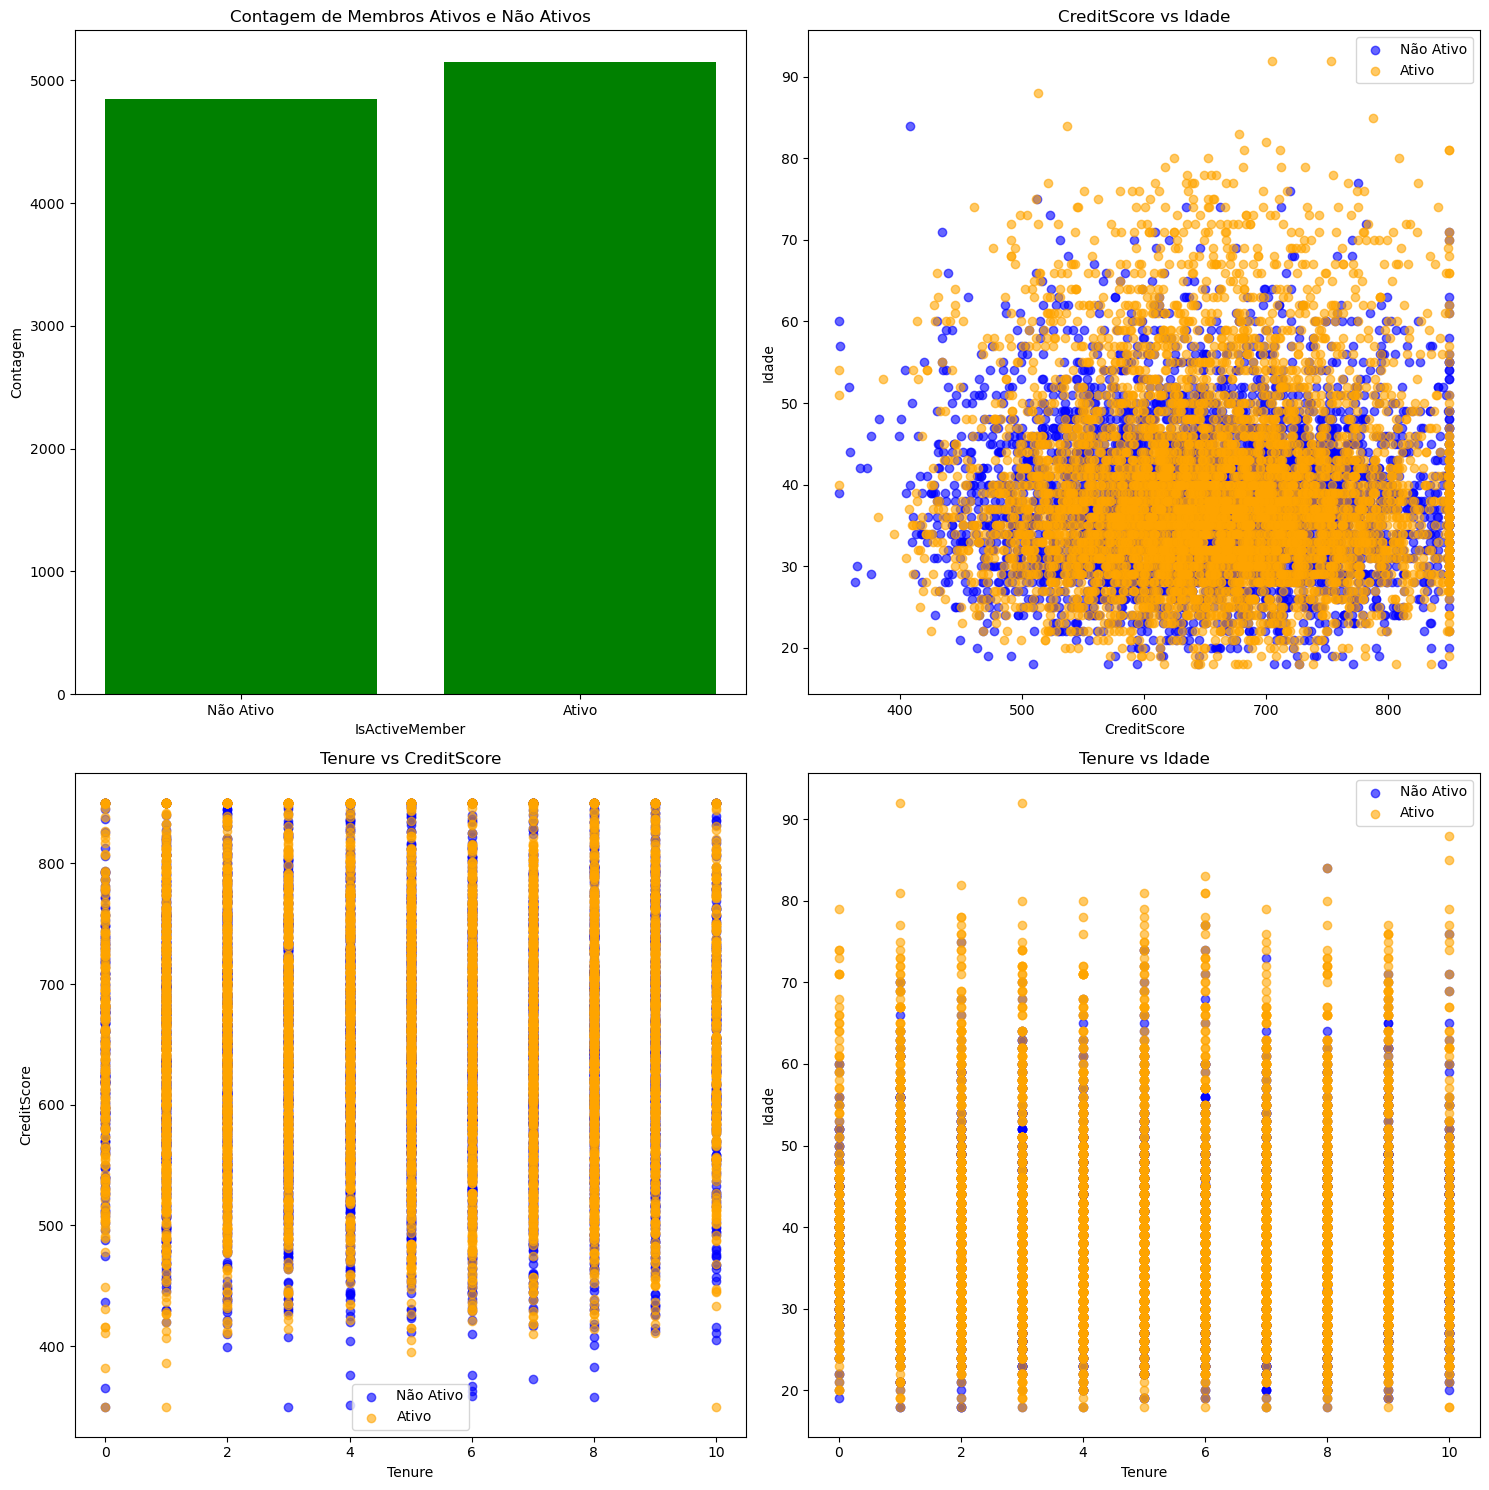

In [66]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].bar(contagem_dados_ativos.index, contagem_dados_ativos['Contagem'], color='green')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Não Ativo', 'Ativo'])
axes[0, 0].set_title('Contagem de Membros Ativos e Não Ativos')
axes[0, 0].set_xlabel('IsActiveMember')
axes[0, 0].set_ylabel('Contagem')

axes[0, 1].scatter(idade_credito_0.index, idade_credito_0['Age'], color='blue', label='Não Ativo', alpha=0.6)
axes[0, 1].scatter(idade_credito_1.index, idade_credito_1['Age'], color='orange', label='Ativo', alpha=0.6)
axes[0, 1].set_title('CreditScore vs Idade')
axes[0, 1].set_xlabel('CreditScore')
axes[0, 1].set_ylabel('Idade')
axes[0, 1].legend()

axes[1, 1].scatter(idade_tempo_0.index, idade_tempo_0['Age'], color='blue', label='Não Ativo', alpha=0.6)
axes[1, 1].scatter(idade_tempo_1.index, idade_tempo_1['Age'], color='orange', label='Ativo', alpha=0.6)
axes[1, 1].set_title('Tenure vs Idade')
axes[1, 1].set_xlabel('Tenure')
axes[1, 1].set_ylabel('Idade')
axes[1, 1].legend()

axes[1, 0].scatter(credito_tempo_0.index, credito_tempo_0['CreditScore'], color='blue', label='Não Ativo', alpha=0.6)
axes[1, 0].scatter(credito_tempo_1.index, credito_tempo_1['CreditScore'], color='orange', label='Ativo', alpha=0.6)
axes[1, 0].set_title('Tenure vs CreditScore')
axes[1, 0].set_xlabel('Tenure')
axes[1, 0].set_ylabel('CreditScore')
axes[1, 0].legend()

plt.tight_layout()
plt.show()



Tentando outra forma de plotagem
1) Preparando os dados
2) Preparando a plotagem

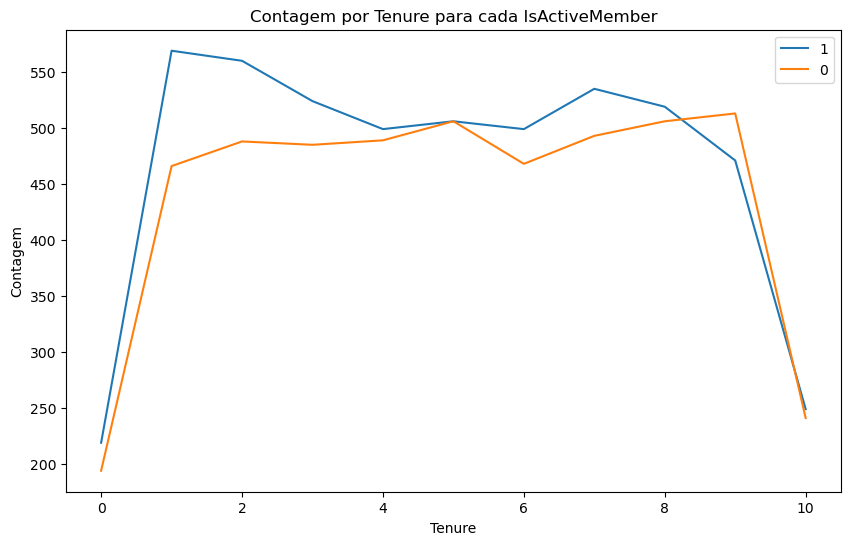

In [77]:
contagem_dados_tempo = contagem_dados[['Contagem', 'IsActiveMember', 'Tenure']]
contagem_dados_tempo = contagem_dados_tempo.groupby(['IsActiveMember', 'Tenure']).count()


fig, ax = plt.subplots(figsize=(10, 6))

contagem_dados_tempo.loc[1].plot(ax=ax, label='1', legend=True)
contagem_dados_tempo.loc[0].plot(ax=ax, label='0', legend=True)

ax.legend(['1', '0'])


ax.set_title('Contagem por Tenure para cada IsActiveMember')
ax.set_xlabel('Tenure')
ax.set_ylabel('Contagem')
plt.show()

C:\Users\pedro\AppData\Local\Temp\ipykernel_37088\2090448468.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_dados_credito = contagem_dados_credito.groupby(['Bins','IsActiveMember']).size()


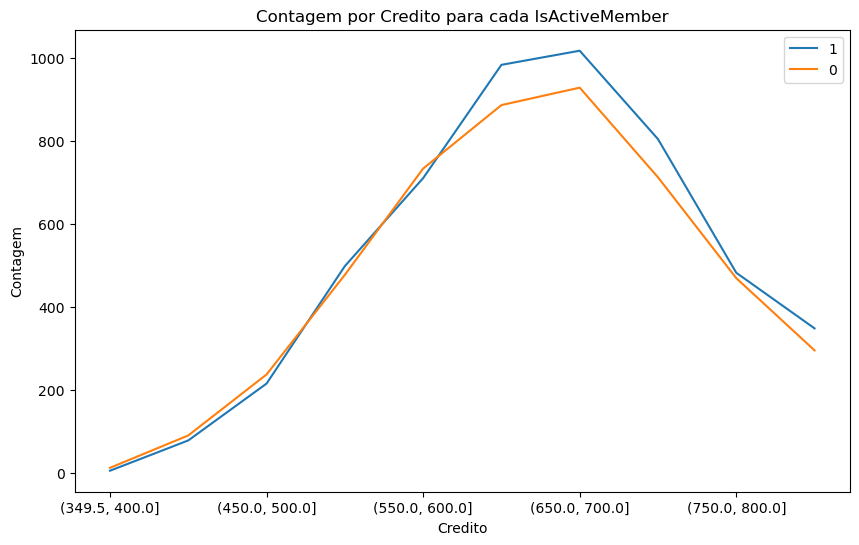

In [98]:
contagem_dados_credito = contagem_dados[['Contagem', 'IsActiveMember', 'CreditScore']].copy()
contagem_dados_credito['Bins'] = pd.cut(contagem_dados_credito['CreditScore'], 10, precision=2)
contagem_dados_credito = contagem_dados_credito.groupby(['Bins','IsActiveMember']).size()

contagem_dados_credito = contagem_dados_credito.unstack(fill_value=0)


fig, ax = plt.subplots(figsize=(10, 6))

contagem_dados_credito[1].plot(ax=ax, label='1', legend=True)
contagem_dados_credito[0].plot(ax=ax, label='0', legend=True)

ax.legend(['1', '0'])


ax.set_title('Contagem por Credito para cada IsActiveMember')
ax.set_xlabel('Credito')
ax.set_ylabel('Contagem')
plt.show()